In [1]:
import sys
sys.path.append("../")

import pandas as pd
import os
import statsmodels.formula.api as sm
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

from library import regulations
from library import analysis
from library import tables


In [2]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")
data = data[data.year == 'yr1415']
data = data[data.doi == True]

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
reg_stars = {}
for reg in regulations.mainless:
    reg_stars[reg] = reg
    
df = analysis.many_y_one_x(data, y_list = regulations.mainless, y_labels = reg_stars, x = 'students_hisp')
df['stars'] = np.where(df['P-value'] > .05, '', 
                  np.where((df['P-value'] <= .05) & (df['P-value'] > .01), '*', 
                      np.where((df['P-value'] <= .01) & (df['P-value'] > .001), '**', 
                          np.where((df['P-value'] <= .001), '***',''))))
for reg in df.Characteristic:
    reg_stars[reg] = df[df.Characteristic == reg]['stars'].values[0]
reg_stars
df

,Characteristic,Control,Difference,Std. Error,P-value,stars
0,reg25_0811,0.92,-0.06,0.04,0.18,
1,reg25_081,0.39,0.05,0.07,0.48,
2,reg25_0812,0.27,0.05,0.07,0.42,
3,reg25_082,0.22,-0.03,0.06,0.57,
4,reg25_112,0.46,-0.09,0.07,0.21,
5,reg21_003,0.78,-0.11,0.06,0.09,
6,reg21_102,0.45,-0.18,0.07,0.01,**
7,reg21_401,0.37,-0.07,0.07,0.30,
8,reg21_352,0.21,-0.02,0.06,0.75,
9,reg21_354,0.06,0.02,0.04,0.67,


In [44]:
cols = []
for reg in regulations.mainless:
    cols.append(reg)
cols.append('students_hisp')
data['bins_hispanic']  = pd.qcut(data['students_hisp'], 5)
p_exempt = data.groupby(['bins_hispanic'])[cols].mean().round(2)
p_exempt = p_exempt.reset_index()
#p_exempt = p_exempt.iloc[[0,4]]
p_exempt

,bins_hispanic,reg25_0811,reg25_081,reg25_0812,reg25_082,reg25_112,reg21_003,reg21_102,reg21_401,reg21_352,reg21_354,reg25_092,reg37_0012,reg25_036,students_hisp
0,"(0.00163, 0.13]",0.90,0.36,0.29,0.24,0.50,0.76,0.45,0.38,0.19,0.05,0.16,0.15,0.27,0.08
1,"(0.13, 0.226]",0.91,0.39,0.30,0.18,0.45,0.74,0.43,0.38,0.20,0.08,0.22,0.23,0.17,0.18
2,"(0.226, 0.366]",0.90,0.43,0.22,0.22,0.39,0.73,0.37,0.31,0.24,0.08,0.34,0.25,0.21,0.29
3,"(0.366, 0.556]",0.90,0.49,0.31,0.17,0.39,0.76,0.36,0.35,0.17,0.05,0.31,0.24,0.17,0.46
4,"(0.556, 0.998]",0.89,0.39,0.32,0.22,0.42,0.71,0.32,0.31,0.20,0.08,0.32,0.25,0.13,0.74


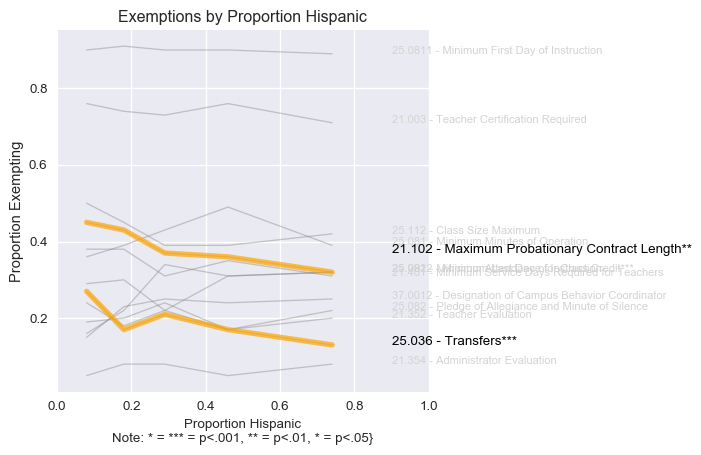

In [42]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


for column in p_exempt[regulations.mainless]:
   plt.plot(p_exempt['students_hisp'], p_exempt[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.xlim(0,1)

emphasize = ['reg21_102', 'reg25_036']

num=0
for i in range(len(regulations.mainless)):
   reg = regulations.mainless[num]
   if reg not in emphasize:
      plt.text(.9, p_exempt[reg][4] , regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='small', color='lightgrey')
   num+=1

for reg in emphasize:
    plt.plot(p_exempt['students_hisp'], p_exempt[reg], marker='', color='orange', linewidth=4, alpha=0.7, label = 'label')
    if reg == 'reg21_102':
        plt.text(.9, p_exempt[reg][4] + .05, regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')
    else:
        plt.text(.9, p_exempt[reg][4], regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')

plt.ylabel('Proportion Exempting')
plt.title('Exemptions by Proportion Hispanic')
plt.xlabel('Proportion Hispanic\nNote: * = *** = p<.001, ** = p<.01, * = p<.05}', size = 'medium')

plt.savefig(table_path + 'spaghetti_geography_hispanic.png', bbox_inches="tight")

plt.show()


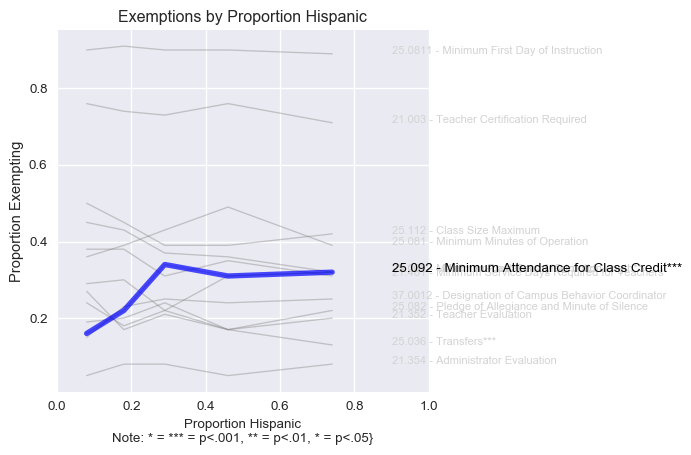

In [43]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


for column in p_exempt[regulations.mainless]:
   plt.plot(p_exempt['students_hisp'], p_exempt[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.xlim(0,1)

emphasize = ['reg25_092']

num=0
for i in range(len(regulations.mainless)):
   reg = regulations.mainless[num]
   if reg not in emphasize:
      plt.text(.9, p_exempt[reg][4] , regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='small', color='lightgrey')
   num+=1

for reg in emphasize:
    plt.plot(p_exempt['students_hisp'], p_exempt[reg], marker='', color='blue', linewidth=4, alpha=0.7, label = 'label')
    if reg == 'reg21_102':
        plt.text(.9, p_exempt[reg][4] + .05, regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')
    else:
        plt.text(.9, p_exempt[reg][4], regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')

plt.ylabel('Proportion Exempting')
plt.title('Exemptions by Proportion Hispanic')
plt.xlabel('Proportion Hispanic\nNote: * = *** = p<.001, ** = p<.01, * = p<.05}', size = 'medium')

plt.savefig(table_path + 'spaghetti_geography_hispanic.png', bbox_inches="tight")

plt.show()